# Análise dos dados de queimadas no estados brasileiros - AMZ

O objetivo deste trabalho consiste em estimar a quantidade de focos de incêndio nos estados brasileiros em anos futuros, considerando os dados dos anos atual e anteriores - Para criação do modelo, será utilizado somente dados dos estados da Amazônia Legal

In [31]:
#bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from enum import Enum
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#funções
class DataSourceEnum(Enum):
    GOOGLE_DRIVE = 'google drive'
    
class DataSourceNotFoundException(Exception):
    def __init__(self):
        super().__init__("Fonte para buscar dados é inválida.")
    
    
    
    
def fetchCSV(url: str, source: DataSourceEnum, encoding: str = 'UTF-8'):
    if source == DataSourceEnum.GOOGLE_DRIVE:
        baseUrl = "https://drive.google.com/uc?id="
        csvData = f"{baseUrl}{url.split('/')[-2]}"
    else:
        raise DataSourceNotFoundException()
        
    if encoding:
        return pd.read_csv(csvData,encoding=encoding)
    return pd.read_csv(csvData)


def cleanData(dataframe, inplace = False):
    return dataframe.dropna(inplace=inplace).drop_duplicates(inplace=inplace)        

class DateMonthEnum(Enum):
    JAN = "Janeiro"
    FEB = "Fevereiro"
    MAR = "Março"
    APR = "Abril"
    MAY = "Maio"
    JUN = "Junho"
    JUL = "Julho"
    AUG = "Agosto"
    SEP = "Setembro"
    OCT = "Outubro"
    NOV = "Novembro"
    DEC = "Dezembro"

    def getMonths():
        return DateMonthEnum.__members__.values()

numericDateMonth = {
    DateMonthEnum.JAN: 1,
    DateMonthEnum.FEB: 2,
    DateMonthEnum.MAR: 3,
    DateMonthEnum.APR: 4,
    DateMonthEnum.MAY: 5,
    DateMonthEnum.JUN: 6,
    DateMonthEnum.JUL: 7,
    DateMonthEnum.AUG: 8,
    DateMonthEnum.SEP: 9,
    DateMonthEnum.OCT: 10,
    DateMonthEnum.NOV: 11,
    DateMonthEnum.DEC: 12,
}
    
def altermonth(dataframe):
    for month in DateMonthEnum.getMonths():
        dataframe.month[dataframe.month==month.value] = numericDateMonth[month]
        
    return dataframe

   
def mergeDataBases(db1, db2):
    db3 = pd.concat([db1,db2])
    return db3

def selection_variables_train_test(x,y):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    return xTrain, xTest, yTrain, yTest


def model_regression_linear(xTrain,yTrain):
    #regr_linear = LinearRegression().fit(xTrain, yTrain)
    regr_linear = RandomForestRegressor().fit(xTrain,yTrain)
    return regr_linear
   
def fit_model(classifier,xTrain,yTrain):
    classifier.fit(xTrain,yTrain)
    return classifier


def plot_graph(dataframe,Titulo:"Gráfico"):
    
    return dataframe.plot(figsize=(10, 6)).set_title(Titulo, fontsize = 15)

def create_dataframe(xTest,yPred,prediction_relative_error,yTest):
    
    dataframe = xTest.copy()
    dataframe['prediction'] = yPred
    dataframe['relative_error'] = prediction_relative_error
    dataframe['Focos de incêndio'] = yTest
    
    return dataframe


def cross_validation(x_axis,y_axis):
  kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()
  NeuralRegression = MLPRegressor()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)
  NeuralRegression_result = cross_val_score(NeuralRegression, x, y, cv = kfold)

  print("Linear Regression Média (R^2): {0}\nElastic Net Média (R^2): {1}\nRidge Média (R^2): {2}\nLasso Média (R^2): {3}\nNeural (R^2): {4}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean(),NeuralRegression_result.mean()))








In [3]:
#Dados queimadas - Amazônia Legal
forestFiresAM = fetchCSV(url='https://drive.google.com/file/d/1vRVra-yLlZxknweY-6YIQQJjWCqK75mT/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE)
forestFiresAM = cleanData(forestFiresAM)

#Dados queimadas - Brasil
forestFires = fetchCSV(url='https://drive.google.com/file/d/1VdFxMxEWzUuqYLTfv2grmFD2tDRdOez-/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
forestFires = cleanData(forestFires)
forestFires

#Dados Desmatamento - Amazônia Legal
deforestation = fetchCSV(url='https://drive.google.com/file/d/1gF9JQPHV7dbviqLl8Z-MY_C8iyF1OREd/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
deforestation = cleanData(deforestation)




In [4]:
#Análise dos dataframes

In [5]:
deforestation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ï»¿Ano/Estados  16 non-null     int64
 1   AC              16 non-null     int64
 2   AM              16 non-null     int64
 3   AP              16 non-null     int64
 4   MA              16 non-null     int64
 5   MT              16 non-null     int64
 6   PA              16 non-null     int64
 7   RO              16 non-null     int64
 8   RR              16 non-null     int64
 9   TO              16 non-null     int64
 10  AMZ LEGAL       16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [6]:
forestFires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6422 non-null   int64  
 1   state   6422 non-null   object 
 2   month   6422 non-null   object 
 3   number  6422 non-null   float64
 4   date    6422 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 301.0+ KB


In [7]:
forestFiresAM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 115.1+ KB


In [8]:
#Conhecer variáveis disponíveis 
deforestation.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [9]:
forestFires.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [10]:
forestFiresAM.columns

Index(['year', 'month', 'state', 'latitude', 'longitude', 'firespots'], dtype='object')

In [11]:
#Análise das estruturas dos dados
deforestation.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [12]:
forestFires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [13]:
forestFiresAM.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [14]:
#Ajustar meses para Dataframe com todos os estados de queimada
forestFires = altermonth(forestFires)
forestFires

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,12,128.0,2012-01-01
6450,2013,Tocantins,12,85.0,2013-01-01
6451,2014,Tocantins,12,223.0,2014-01-01
6452,2015,Tocantins,12,373.0,2015-01-01


In [15]:
### Análise dos dados
forestFiresAM['firespots'].describe()

count     2104.000000
mean      1167.417776
std       2959.558714
min          1.000000
25%         16.000000
50%        121.000000
75%        755.000000
max      37926.000000
Name: firespots, dtype: float64

In [16]:
print('Max number of registered fires in a month: ',forestFiresAM['firespots'].max())
print('State: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].max()]['state'].iloc[0])
print('Month: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].max()]['month'].iloc[0])
print('Year: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].max()]['year'].iloc[0])

Max number of registered fires in a month:  37926
State:  PARA
Month:  8
Year:  2002


In [ ]:
print('Min number of registered fires in a month: ',forestFiresAM['firespots'].min())
print('State: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].min()]['state'].iloc[0])
print('Month: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].min()]['month'].iloc[0])
print('Year: ',forestFiresAM[forestFiresAM['firespots'] ==  forestFiresAM['firespots'].min()]['year'].iloc[0])

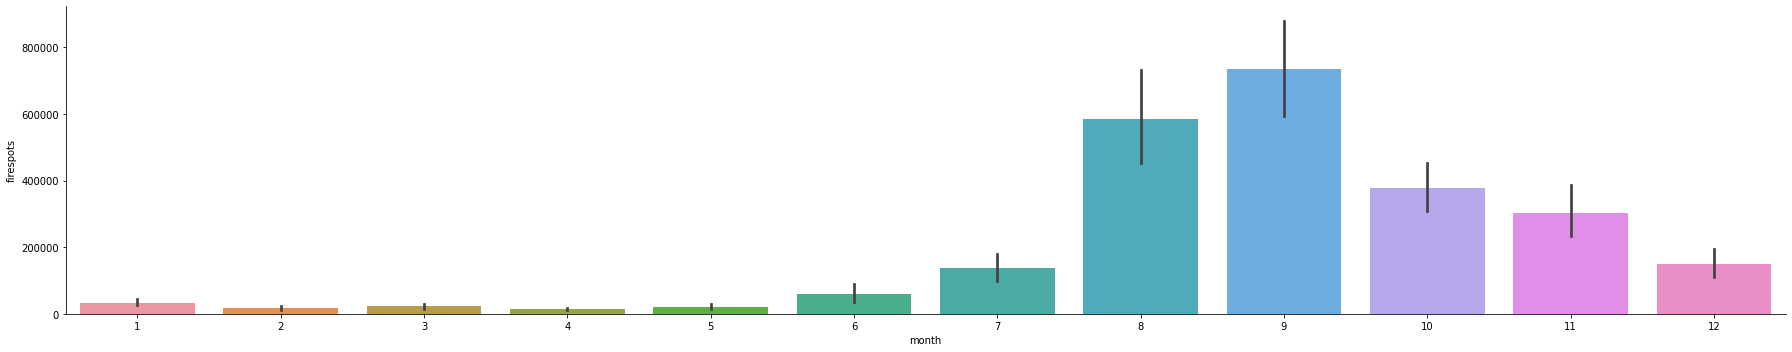

In [17]:
sns.catplot(x='month', y='firespots', kind='bar',data=forestFiresAM[['month','firespots']], aspect=5, estimator=sum)

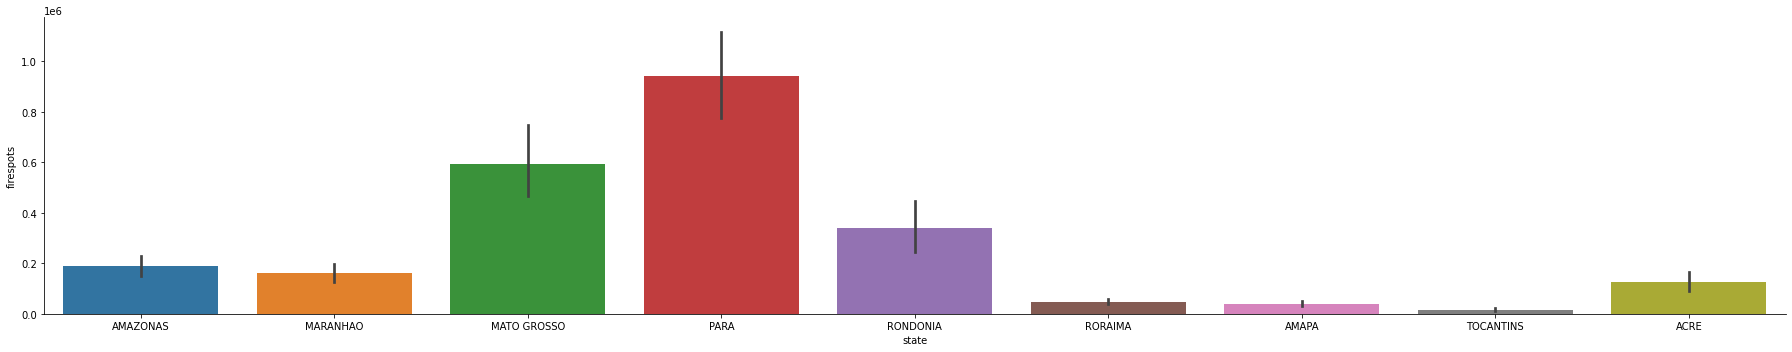

In [18]:
sns.catplot(x='state', y='firespots', kind='bar',data=forestFiresAM[['state','firespots']], aspect=5, estimator=sum)

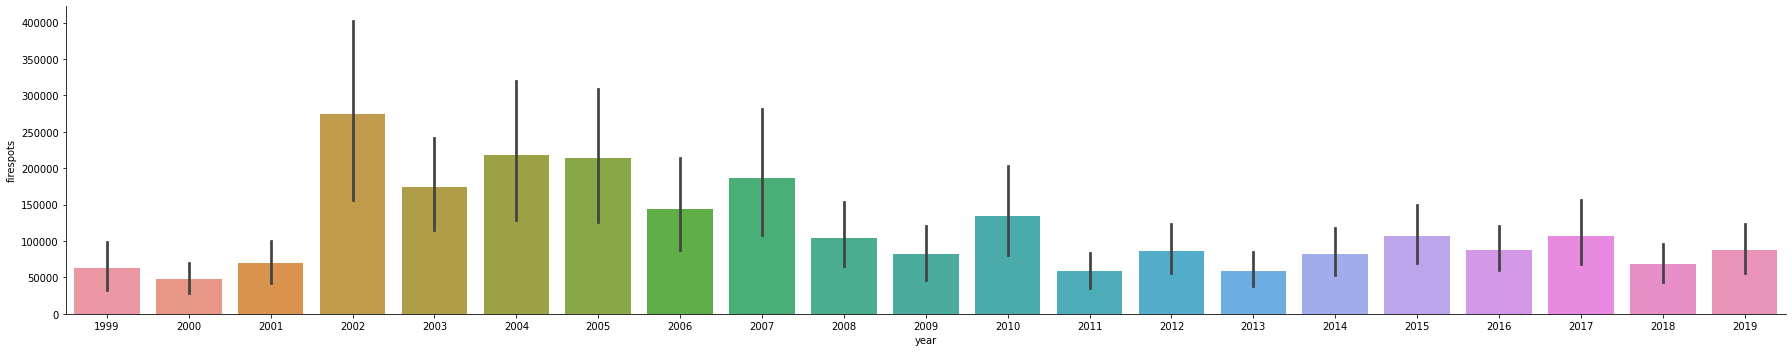

In [19]:
sns.catplot(data=forestFiresAM[['year','firespots']],x='year', y='firespots', kind='bar', aspect=5, estimator=sum)

Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019


Text(0.5, 0, 'Anos')

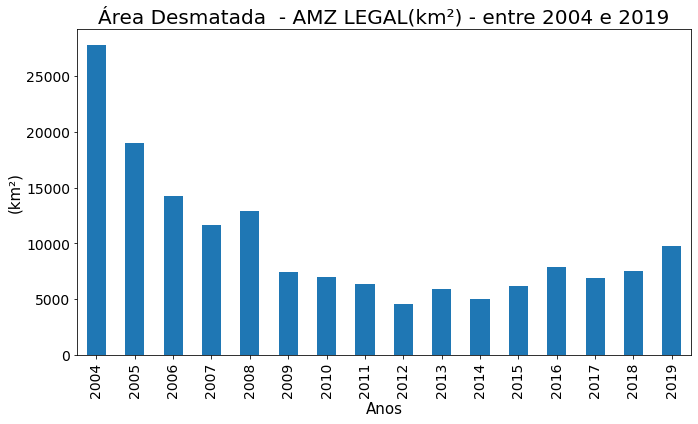

In [26]:
###Análise da área desmatada na Amazônia Legal E área queimada
deforestation.set_index('ï»¿Ano/Estados',inplace = True)
print("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019")
grafico_barras_amz = deforestation['AMZ LEGAL'].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019", fontsize = 20)
grafico_barras_amz.set_ylabel("(km²)",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

In [32]:
#Análise da correlação entre variáveis
forestFiresAM.corr()

,year,month,latitude,longitude,firespots
year,1.000000,-0.027188,0.009145,-0.016152,-0.089704
month,-0.027188,1.000000,0.001159,0.016174,0.251108
latitude,0.009145,0.001159,1.000000,0.231742,-0.150331
longitude,-0.016152,0.016174,0.231742,1.000000,0.036946
firespots,-0.089704,0.251108,-0.150331,0.036946,1.000000


In [33]:
#Ajustar variáveis categóricas para indicadoras
dados_estados_binarios = pd.get_dummies(forestFiresAM['state'])
dados_estados_binarios.head()

,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0


In [34]:

vars_categoricas = ['state']

df2_forestFiresAM = forestFiresAM 

for i in vars_categoricas:
  dados_estados_binarios = pd.get_dummies(forestFiresAM[i])
  df2_forestFiresAM = df2_forestFiresAM.drop(i,axis = 1)
  df2_forestFiresAM=df2_forestFiresAM.join(dados_estados_binarios)

df2_forestFiresAM

,year,month,latitude,longitude,firespots,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,1999,1,-2.371113,-59.899933,3,0,0,1,0,0,0,0,0,0
1,1999,1,-2.257395,-45.487831,36,0,0,0,1,0,0,0,0,0
2,1999,1,-12.660633,-55.057989,18,0,0,0,0,1,0,0,0,0
3,1999,1,-2.474820,-48.546967,87,0,0,0,0,0,1,0,0,0
4,1999,1,-12.861700,-60.513100,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2019,12,-12.138385,-56.066297,148,0,0,0,0,1,0,0,0,0
2100,2019,12,-2.976727,-50.909316,1280,0,0,0,0,0,1,0,0,0
2101,2019,12,-10.809262,-62.890452,42,0,0,0,0,0,0,1,0,0
2102,2019,12,2.856667,-60.431963,27,0,0,0,0,0,0,0,1,0


In [35]:
#Ajustes no conjunto de dados
df2_forestFiresAM = df2_forestFiresAM.loc[df2_forestFiresAM['year']>=2000]
columns_df2 = ['year',  'ACRE', 'AMAPA',
       'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA',
       'TOCANTINS','firespots']
df2_forestFiresAM = df2_forestFiresAM[columns_df2]
df2_forestFiresAM = df2_forestFiresAM.groupby(['year',  'ACRE', 'AMAPA',
       'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA',
       'TOCANTINS']).sum().reset_index()

In [37]:
#Separando dados de target e features
target = "firespots"

y = df2_forestFiresAM[target]
X = df2_forestFiresAM.drop([target],axis=1)

In [38]:
#Separando dados de treino e teste
xTrain, xTest, yTrain, yTest = selection_variables_train_test(X,y)

In [39]:
#Fazendo validação cruzada
cross_validation(X,y)

C:\Users\alyne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161129099.65660286, tolerance: 5377594.874662345
  positive)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200330626.06937218, tolerance: 5454490.636
  positive)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143138218.20664215, tolerance: 4340118.020129012
  positive)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

Linear Regression Média (R^2): 0.5759390107488901
Elastic Net Média (R^2): 0.12378217588267644
Ridge Média (R^2): 0.47675655518282734
Lasso Média (R^2): 0.5151838225670725
Neural (R^2): -0.15444204837516787


C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
#Modelo de Regressão Linear
regr_linear = fit_model(LinearRegression(),xTrain,yTrain)

In [41]:
yPred = regr_linear.predict(xTest)

In [42]:
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [43]:
df_regressao_linear = create_dataframe(xTest,yPred,prediction_relative_error,yTest)
df_regressao_linear

,year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS,prediction,relative_error,Focos de incêndio
97,2010,0,1,0,0,0,0,0,0,0,1397.985990,39.798599,1000
123,2013,0,0,1,0,0,0,0,0,0,8237.291304,26.494031,6512
162,2018,0,0,0,0,0,0,0,0,1,-3059.232888,1188.694978,281
75,2008,0,0,0,0,0,1,0,0,0,48770.396468,0.663371,48449
142,2015,0,1,0,0,0,0,0,0,0,-943.329681,132.129758,2936
117,2013,0,0,0,0,0,0,0,0,1,-717.917217,296.689649,365
67,2007,0,0,0,0,1,0,0,0,0,28749.570792,45.133360,52399
0,2000,0,0,0,0,0,0,0,0,1,5369.503528,556.418524,818
103,2011,0,0,0,0,1,0,0,0,0,26876.518255,195.249020,9103
9,2001,0,0,0,0,0,0,0,0,1,4901.240394,248.099460,1408


In [44]:
regr_linear.score(xTest, yTest)

0.5456456170464379

In [45]:
df_regressao_linear = df_regressao_linear.sort_values(['year'])
df_regressao_linear.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Regressão Linear')

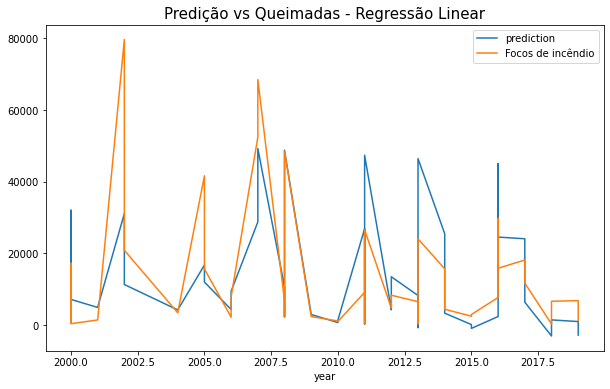

In [46]:
plot_graph(df_regressao_linear[['prediction','Focos de incêndio']],"Predição vs Queimadas - Regressão Linear")

In [47]:
#Rede neural
xTrain_neural, xTest_neural, yTrain_neural, yTest_neural = selection_variables_train_test(X,y)
classifier_RN = fit_model(MLPRegressor(),xTrain_neural,yTrain_neural)
yPred_neural = classifier_RN.predict(xTest_neural)
prediction_relative_error_neural = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_neural,yTest_neural))]

C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
df_rede_neural = create_dataframe(xTest_neural,yPred_neural,prediction_relative_error_neural,yTest_neural)
df_rede_neural

,year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS,prediction,relative_error,Focos de incêndio
166,2018,0,0,0,0,1,0,0,0,0,5144.615348,55.730012,11621
49,2005,0,0,0,0,1,0,0,0,0,5111.502847,90.443824,53489
58,2006,0,0,0,0,1,0,0,0,0,5114.049962,84.382196,32745
145,2016,0,0,0,0,0,0,0,1,0,5137.839684,32.760715,3870
62,2006,1,0,0,0,0,0,0,0,0,5113.863248,17.491719,6198
124,2013,0,1,0,0,0,0,0,0,0,5129.876242,235.505313,1529
12,2001,0,0,0,0,0,1,0,0,0,5101.158920,82.157541,28590
129,2014,0,0,0,0,0,1,0,0,0,5134.271421,85.547848,35526
116,2012,1,0,0,0,0,0,0,0,0,5129.145941,8.668346,4720
4,2000,0,0,0,0,1,0,0,0,0,5098.767269,70.428214,17242


In [49]:
classifier_RN.score(xTest_neural, yTest_neural)

-0.5278439243130051

In [50]:
df_rede_neural = df_rede_neural.sort_values(['year'])
df_rede_neural.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Rede Neural')

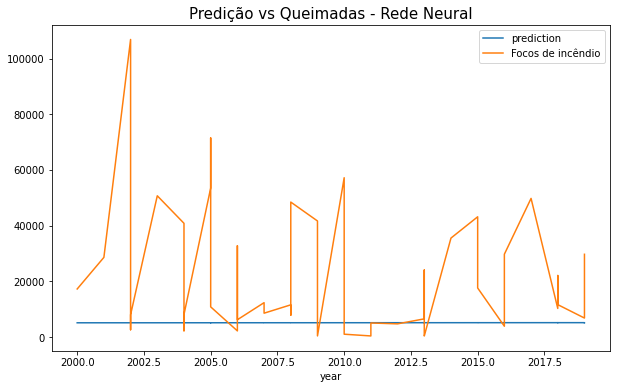

In [51]:
plot_graph(df_rede_neural[['prediction','Focos de incêndio']],"Predição vs Queimadas - Rede Neural")

In [52]:
##Elastic Net
xTrain_elastic, xTest_elastic, yTrain_elastic, yTest_elastic =  selection_variables_train_test(X,y)


In [53]:
classifier_EN = fit_model(ElasticNet(),xTrain_elastic,yTrain_elastic)
yPred_elastic = classifier_EN.predict(xTest_elastic)

In [54]:
prediction_relative_error_elastic = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_elastic,yTest_elastic))]

In [55]:


df_en = create_dataframe(xTest_elastic,yPred_elastic,prediction_relative_error_elastic,yTest_elastic)
df_en

,year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS,prediction,relative_error,Focos de incêndio
3,2000,0,0,0,0,0,1,0,0,0,23670.646678,30.051353,18201
178,2019,0,1,0,0,0,0,0,0,0,6977.304286,448.530211,1272
113,2012,0,0,0,1,0,0,0,0,0,11018.235124,59.246063,6919
66,2007,0,0,0,0,0,1,0,0,0,20517.534127,70.043460,68491
36,2004,0,0,0,0,0,0,0,0,1,13469.163222,1705.517858,746
6,2000,0,0,1,0,0,0,0,0,0,16852.831748,1866.491453,857
98,2010,1,0,0,0,0,0,0,0,0,11622.474059,34.193212,8661
134,2014,1,0,0,0,0,0,0,0,0,9820.695458,123.299124,4398
50,2005,0,0,0,1,0,0,0,0,0,14171.347676,30.973638,10820
104,2011,0,0,0,1,0,0,0,0,0,11468.679774,130.479899,4976


In [56]:
classifier_EN.score(xTest_elastic, yTest_elastic)

0.23711574164216143

In [57]:
df_en = df_en.sort_values(['year'])
df_en.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Elastic')

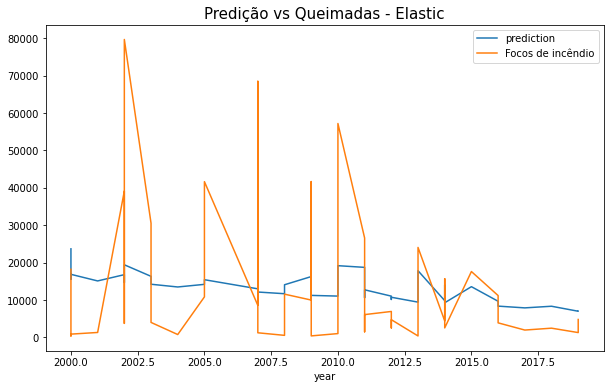

In [58]:
plot_graph(df_en[['prediction','Focos de incêndio']],"Predição vs Queimadas - Elastic")

In [59]:
#lASSO 
xTrain_lasso, xTest_lasso, yTrain_lasso, yTest_lasso =  selection_variables_train_test(X,y)


In [60]:
classifier_lasso = fit_model(Lasso(),xTrain_lasso,yTrain_lasso)


C:\Users\alyne\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153594527.4545021, tolerance: 3981625.291485928
  positive)


In [61]:
yPred_lasso = classifier_lasso.predict(xTest_lasso)

In [62]:
prediction_relative_error_lasso = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_lasso,yTest_lasso))]

In [63]:

df_lasso = create_dataframe(xTest_lasso,yPred_lasso,prediction_relative_error_lasso,yTest_lasso)
df_lasso

,year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS,prediction,relative_error,Focos de incêndio
94,2010,0,0,0,0,1,0,0,0,0,25364.379589,10.569143,28362
96,2010,0,0,1,0,0,0,0,0,0,9904.042455,18.411381,12139
108,2012,0,0,0,0,0,0,0,0,1,-815.872766,300.953883,406
93,2010,0,0,0,0,0,1,0,0,0,44238.545098,22.654477,57196
161,2017,1,0,0,0,0,0,0,0,0,2012.576875,68.028961,6295
70,2007,0,1,0,0,0,0,0,0,0,3802.602994,156.240094,1484
7,2000,0,1,0,0,0,0,0,0,0,7461.810437,2849.332189,253
142,2015,0,1,0,0,0,0,0,0,0,-379.348369,112.920585,2936
58,2006,0,0,0,0,1,0,0,0,0,27455.355270,16.154053,32745
6,2000,0,0,1,0,0,0,0,0,0,15131.481660,1665.633799,857


In [64]:
classifier_lasso.score(xTest_lasso,yTest_lasso)

0.6051263186550386

In [65]:
df_lasso = df_lasso.sort_values(['year'])
df_lasso.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Lasso')

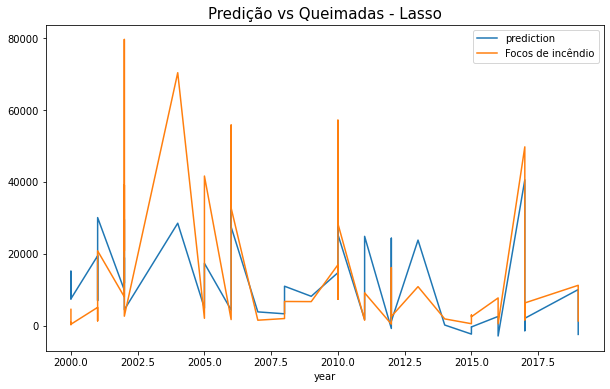

In [66]:
plot_graph(df_lasso[['prediction','Focos de incêndio']],"Predição vs Queimadas - Lasso")